<a href="https://colab.research.google.com/github/mrpintime/TitanicSurvivor/blob/main/Titanic_(Kaggle_Competition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
# !python rapidsai-csp-utils/colab/pip-install.py

In [ ]:
# import opendatasets as op

In [1]:
# op.download("https://www.kaggle.com/c/titanic")

# Dataset Description

# Problem

# Import Dataset

In [ ]:
df = pd.read_csv('/content/titanic/train.csv')

# Cleansing

In [2]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt


**Let's see dataset shape, columns, missing values**

it is normal dataset size  

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We have `177 missing values` for `Age` and `687 missing values` for `Cabin` and `2 missing values` for `Embarked`

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Let's see do we have `unique passangers` or `not (duplicate)`, if we have duplicate row we should `remove` it.  

as we can see we do not have duplicate passengers. good for us.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.duplicated(['PassengerId']).sum()

0

We can remove the `Name` column cause we do not need it in our future analysis.   
`If you say why we do not need it, i can tell you that can you predict somthing based on the name of the person is that reasonable ?`  

In [ ]:
df = df.drop(columns=['Name'], axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


Let's check are we can remove `Ticket` column or not 

In [ ]:
df.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

As you can see we have `681 unique tickets` and `134` of them purchased more that once.

In [ ]:
np.sum(df.Ticket.value_counts() > 1)

134

In [ ]:
len(df.Ticket.unique())

681

So if we decide to keep it we have to convert all `681` unique tickets to numeric value and therefore if we use `get_dummies` we will have `681` extra columns with `binary` value, if we use we use `LabelEncoder` for not binary encoder we will have `681 unique values` in `one column`.  
and also there are some extra information and services that provided for passengers with their tickets that did not include in dataset. 


---


**In conclusion** we keep it for now 

Let's deal with `nan` values in `Age`, `Embarked` and `Cabin` columns.

In [ ]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,female,62.0,0,0,113572,80.0,B28,NaN


one approache to dealing with `nan` values is replace it with somthing reasonable. so we can use most ferquent value in `Embarked` and replace it with `NAN` value.   

In [ ]:
df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
df[(df['Fare'] == 80)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,female,62.0,0,0,113572,80.0,B28,NaN


As we can see `S` has more frequent for fare bellow than `120`,  also more in overall, and also because we have only two nan value for `Embarked` we can set them to `S`.

<Axes: xlabel='Embarked', ylabel='Fare'>

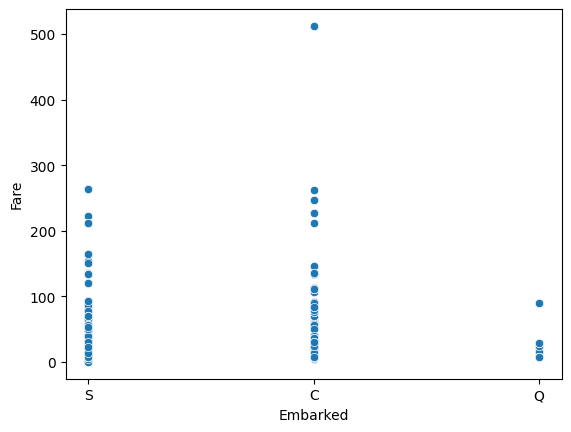

In [ ]:
sns.scatterplot(df[['Fare', 'Embarked']], x='Embarked', y='Fare')

In [ ]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
df.loc[[61,829],['Embarked']] = np.array(['S', 'S'])

In [ ]:
df.loc[[61,829],['Embarked']]

,Embarked
61,S
829,S


Let's check `Cabin` column.

In [ ]:
df.Cabin.isnull().sum()

687

In [ ]:
df[df.Cabin.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
df.Cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [ ]:
np.sum(df[['Cabin','Ticket']][df.Cabin.isnull()]['Ticket'].value_counts() > 1)

82

In [ ]:
df.Cabin.isnull().sum() / df.shape[0]

0.7710437710437711

So as you can see it is not so easy if we want to replace `687` nan values with reasonable values also it is not good if we want to replace these numbers of data with nan values cause it makes our dataset to has bias as we see `77 percent` of all data in Cabin column are missing value so we use can do two thing:

1.   remove rows that contain `nan` value for `Cabin` column.
2.   remove `Cabin` column from our dataset

---
we choose second one because we do not want to loose so much information from other columns.


In [ ]:
df = df.drop(columns=['Cabin'], axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


Let's Check `Age` column.

In [ ]:
df.Age.isnull().sum()

177

In [ ]:
df[df.Age.isnull()].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,male,NaN,0,0,330877,8.4583,Q
17,18,1,2,male,NaN,0,0,244373,13.0000,S
19,20,1,3,female,NaN,0,0,2649,7.2250,C
26,27,0,3,male,NaN,0,0,2631,7.2250,C
28,29,1,3,female,NaN,0,0,330959,7.8792,Q


In [ ]:
df[df.Age.isnull()].Embarked.value_counts()

S    90
Q    49
C    38
Name: Embarked, dtype: int64

In [ ]:
df[df.Age.isnull()].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


In [ ]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df[(df.Age.isnull()) & (df.Parch==0)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,male,NaN,0,0,330877,8.4583,Q
17,18,1,2,male,NaN,0,0,244373,13.0000,S
19,20,1,3,female,NaN,0,0,2649,7.2250,C
26,27,0,3,male,NaN,0,0,2631,7.2250,C
28,29,1,3,female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,male,NaN,0,0,11774,29.7000,C
849,850,1,1,female,NaN,1,0,17453,89.1042,C
859,860,0,3,male,NaN,0,0,2629,7.2292,C
868,869,0,3,male,NaN,0,0,345777,9.5000,S


<Axes: xlabel='Age', ylabel='SibSp'>

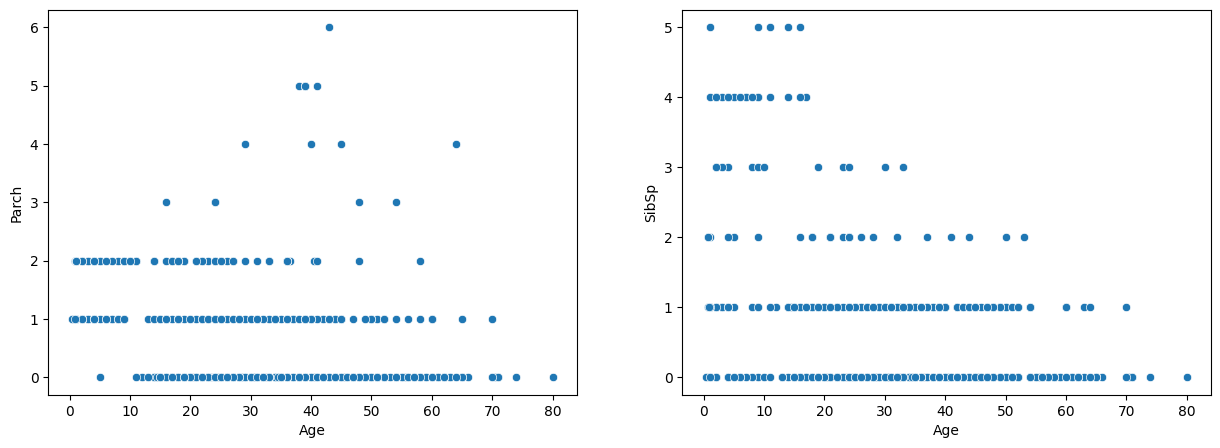

In [ ]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Age', y='Parch', ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.scatterplot(data=df, x='Age', y='SibSp',ax=ax2)

In [ ]:
df[(df.Age.isnull())].Parch.value_counts()

0    157
2     12
1      8
Name: Parch, dtype: int64

In [ ]:
df[(df.Age.isnull()) & (df.SibSp==0)].Parch.value_counts()

0    133
2      3
1      1
Name: Parch, dtype: int64

In [ ]:
df[(df.Age.isnull()) & (df.Parch==0)].SibSp.value_counts()

0    133
1     21
2      3
Name: SibSp, dtype: int64

In [ ]:
df[(df.Parch==0) & (df.SibSp==0)].Age.describe()

count    404.000000
mean      32.220297
std       12.899871
min        5.000000
25%       22.000000
50%       29.500000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

we have `177` numbers of nan values that `133` of them have `Parch and SibSp equal to Zero`.

In [ ]:
mask = ~((df.Parch==0) & (df.SibSp==0))

In [ ]:
df[mask].Age.describe()

count    310.000000
mean      26.413452
std       15.834923
min        0.420000
25%       16.000000
50%       26.000000
75%       37.000000
max       70.000000
Name: Age, dtype: float64

we have some insight here lets explore more

<Axes: xlabel='Parch', ylabel='Count'>

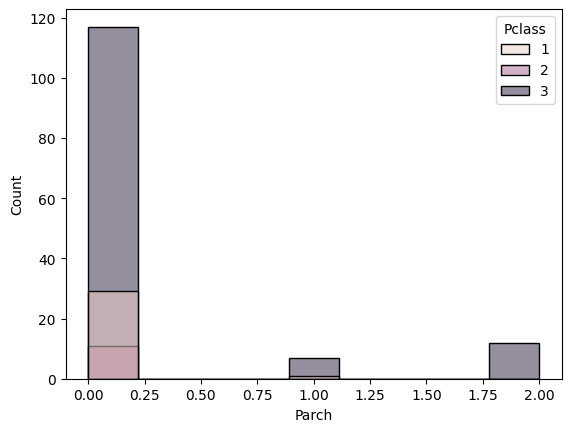

In [ ]:
sns.histplot(data=df[(df.Age.isnull())], x='Parch', hue='Pclass')

<Axes: xlabel='Pclass', ylabel='Count'>

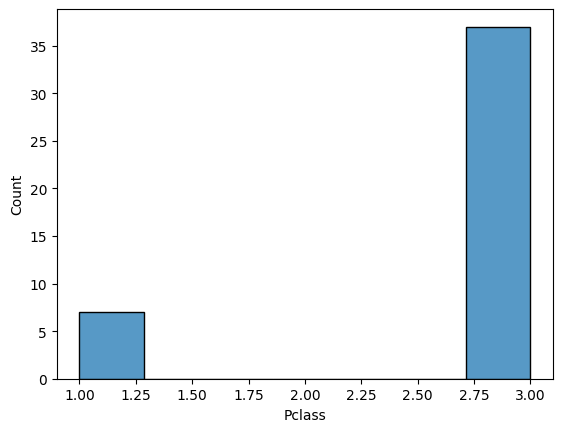

In [ ]:
sns.histplot(data=df[(df.Age.isnull()) & mask], x='Pclass')

Let's use some mean of pclass, Parch, SbSip

In [5]:
df[(df.Parch==0) & (df.SibSp==0) & (df.Parch==0)].Age.describe()

count    404.000000
mean      32.220297
std       12.899871
min        5.000000
25%       22.000000
50%       29.500000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [7]:
df = df.fillna(value='32', axis=1)

so check dataset missing values for another once 

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Done for now**  
we can use another method to fill the missing values

In [11]:
# Save semi-preprocessed dataset
# df.to_csv("/content/drive/MyDrive/Titanic/semi-preprocessed.csv", index=False)

In [10]:
# Read the dataset
# df = pd.read_csv("/content/drive/MyDrive/Titanic/semi-preprocessed.csv")